In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
X,y = load_iris(return_X_y=True)

In [5]:
import matplotlib.pyplot as plt

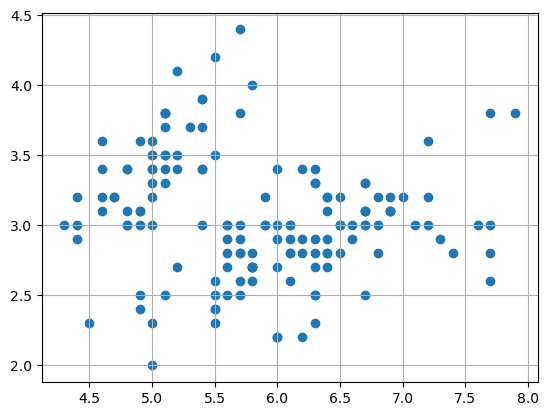

In [6]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

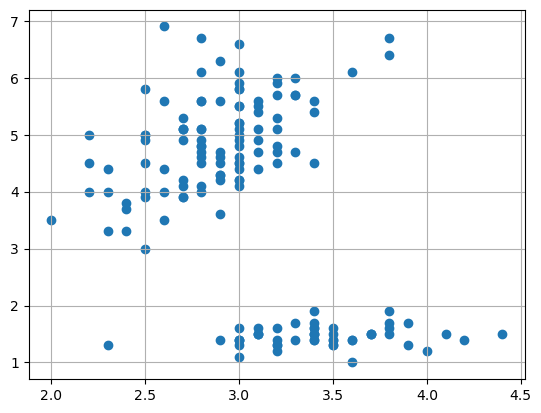

In [37]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,1],X[:,2])
plt.show()

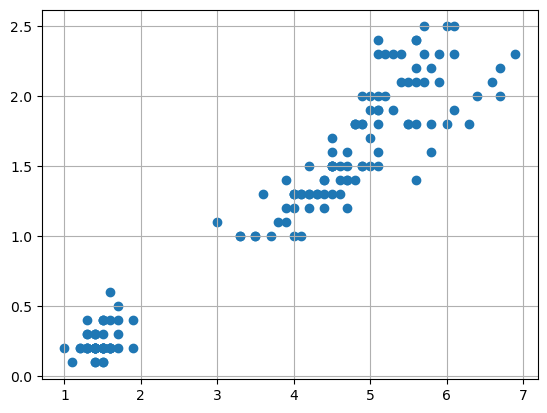

In [38]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,2],X[:,3])
plt.show()

In [7]:
model = KMeans(n_clusters = 2, random_state=2)

In [8]:
model.fit(X)

KMeans(n_clusters=2, random_state=2)

In [9]:
model.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

In [12]:
model.inertia_

152.3479517603579

In [17]:
model = KMeans(n_clusters = 3, random_state=2)
model.fit(X)

KMeans(n_clusters=3, random_state=2)

In [18]:
model.inertia_

78.85144142614601

In [21]:
see = []
for k in range(1,11):
    model = KMeans(n_clusters = k, random_state=2)
    model.fit(X)
    see.append(model.inertia_)

In [22]:
import seaborn as sns

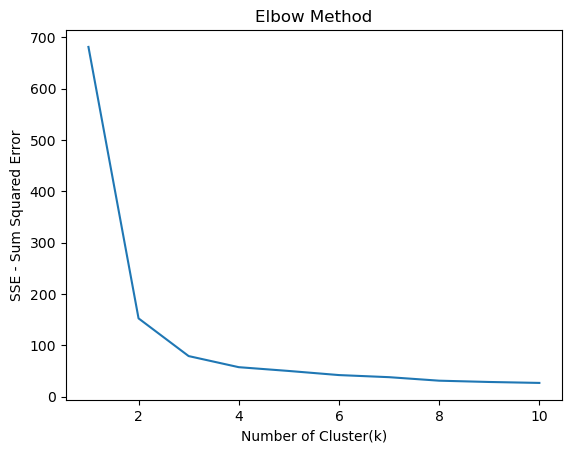

In [23]:
splot = sns.lineplot(x=range(1,11), y=see)

splot.set(xlabel="Number of Cluster(k)", ylabel="SSE - Sum Squared Error", title="Elbow Method")

plt.show()

In [42]:
model = KMeans(n_clusters = 3, random_state=2)
model.fit(X)

KMeans(n_clusters=3, random_state=2)

In [43]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [44]:
predict = model.fit_predict(X)

In [45]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [29]:
from sklearn.preprocessing import normalize

In [30]:
X_noramlzie = normalize(X)

In [33]:
X_noramlzie[0:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [34]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [35]:
model.fit(X_noramlzie)

KMeans(n_clusters=3, random_state=2)

In [46]:
predict = model.fit_predict(X_noramlzie)

In [47]:
import matplotlib.cm as cm

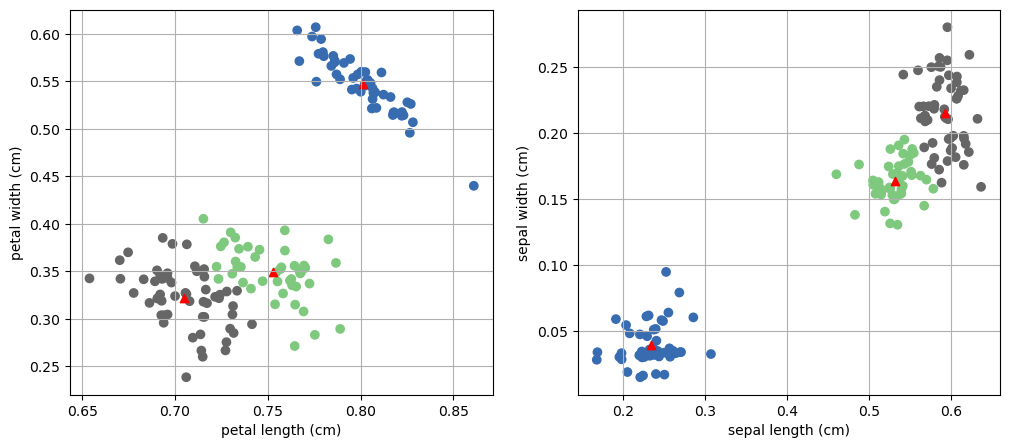

In [49]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_noramlzie[:,0],X_noramlzie[:,1],c = predict, cmap=cm.Accent)
plt.grid(True)
for center in model.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
     
plt.subplot(1,2,2)   
plt.scatter(X_noramlzie[:,2],X_noramlzie[:,3],c = predict, cmap=cm.Accent)
plt.grid(True)
for center in model.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [56]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

In [57]:
score = silhouette_score(X_noramlzie, model.labels_)

In [58]:
score

0.5763264768100266

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5511916046195919
For n_clusters = 4 The average silhouette_score is : 0.49535632852884987
For n_clusters = 5 The average silhouette_score is : 0.4898982472843943
For n_clusters = 6 The average silhouette_score is : 0.47506295195987086


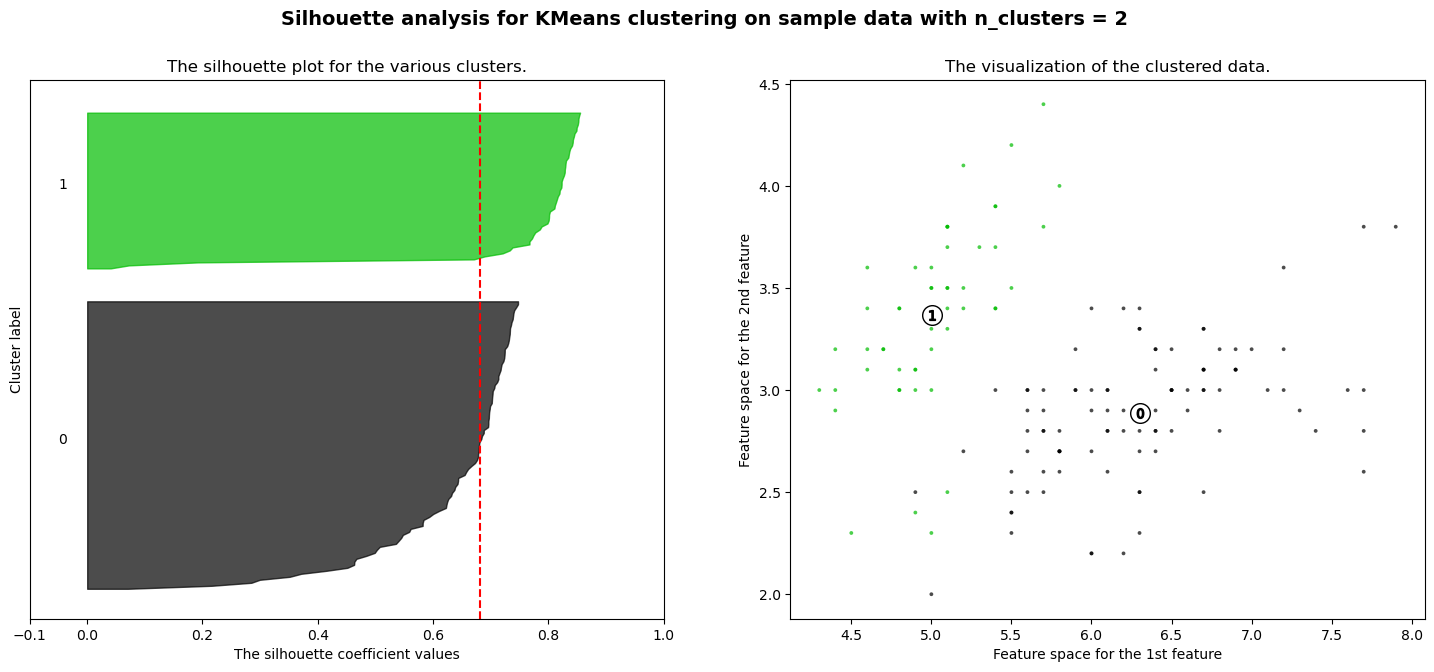

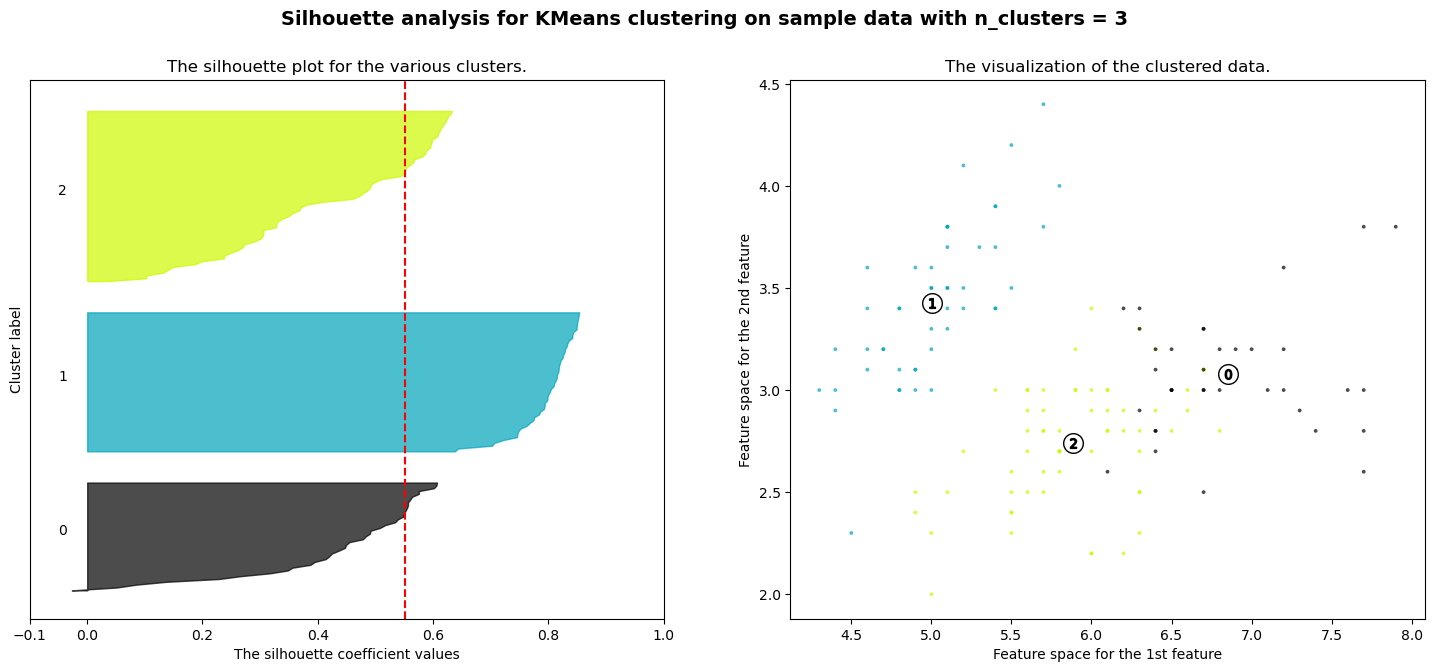

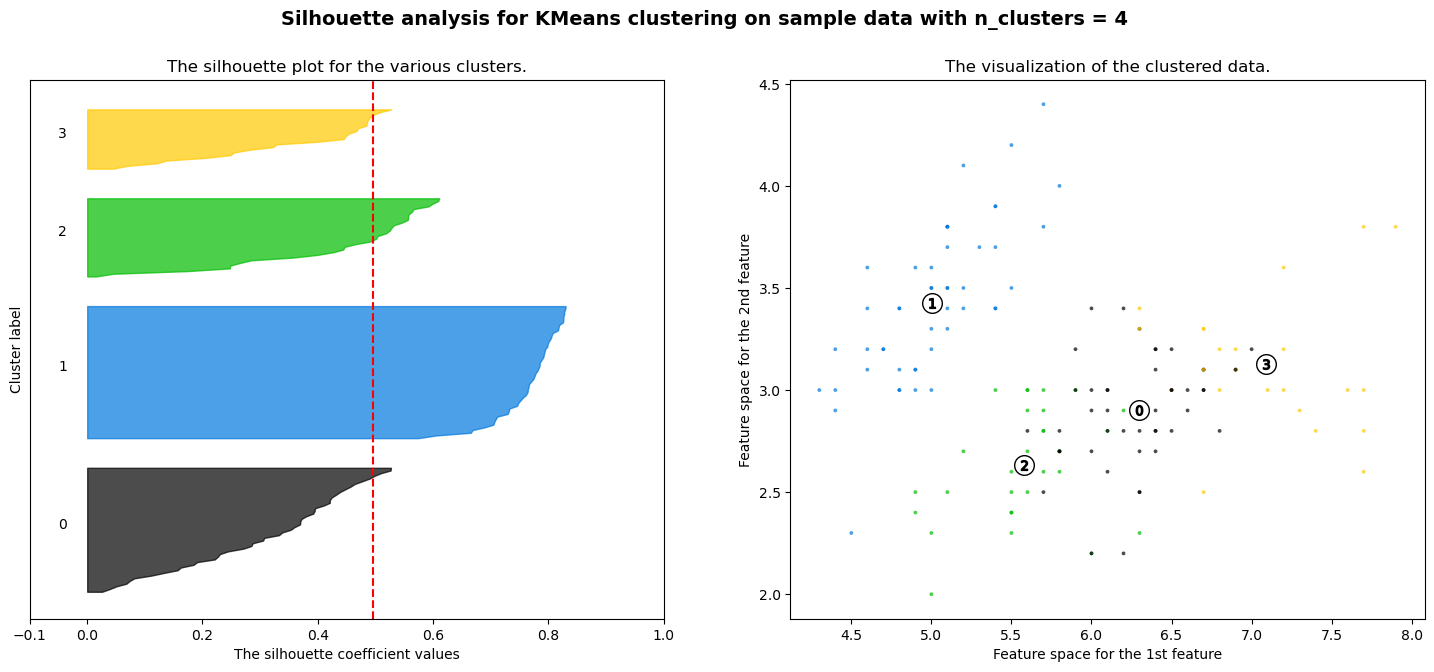

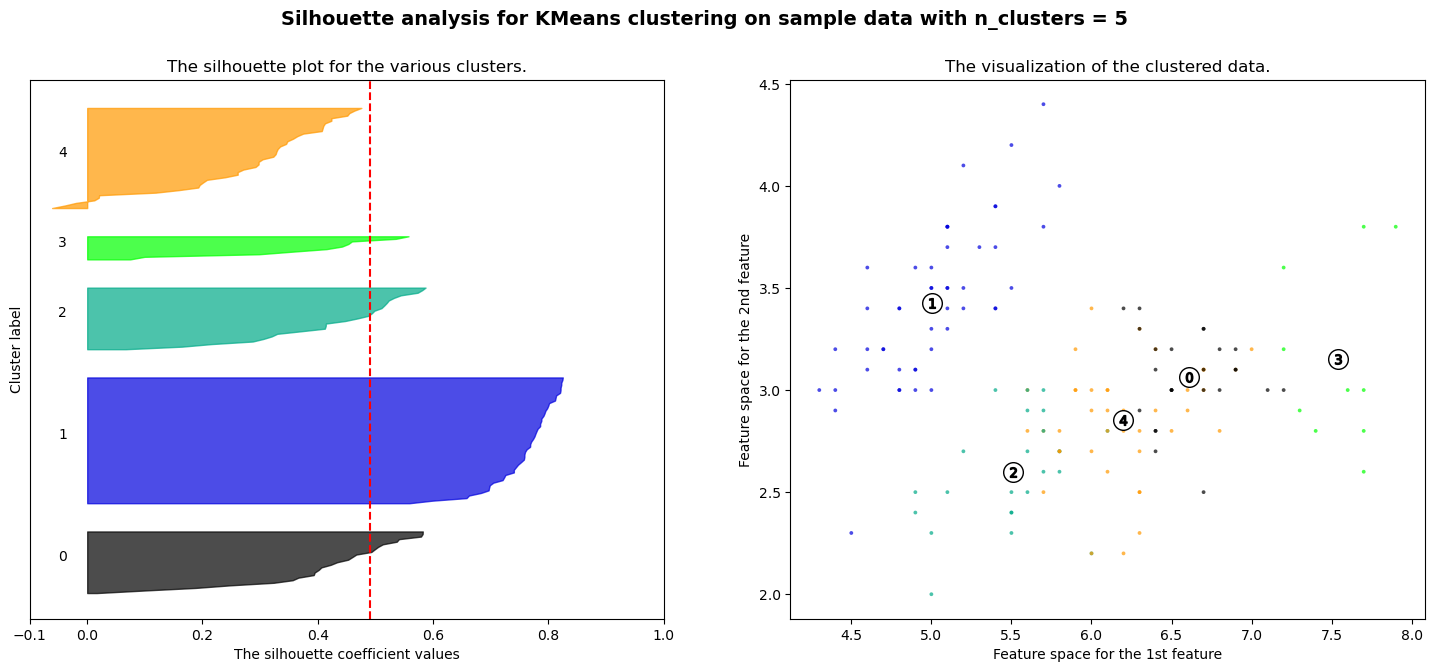

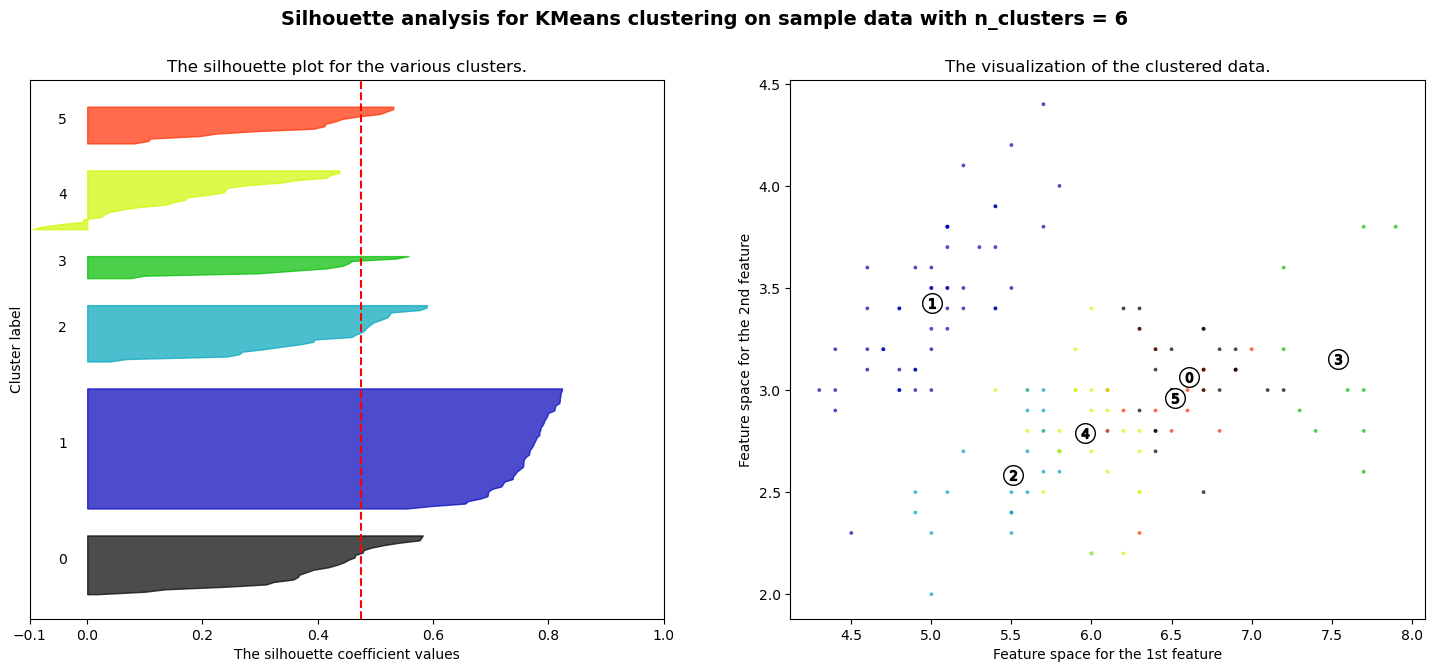

In [59]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [66]:
data = load_iris()

In [67]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [73]:
models = []
scores = []
for k in range(2,8):
    model = KMeans(n_clusters = k, random_state = 12).fit(X_noramlzie)
    models.append(model)
    score = silhouette_score(X_noramlzie, model.labels_)
    scores.append(score)

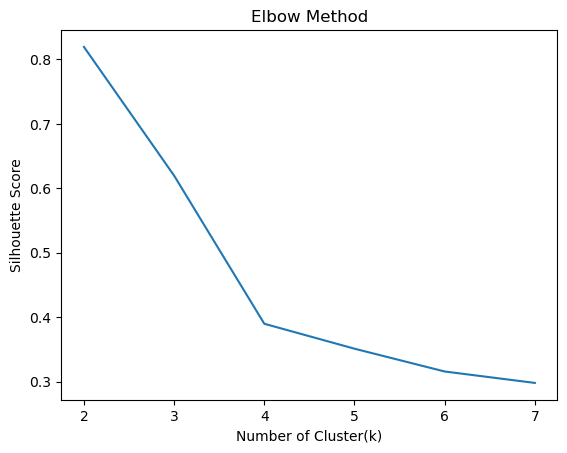

In [74]:
splot = sns.lineplot(x=range(2, 8), y=scores)

splot.set(xlabel="Number of Cluster(k)", ylabel="Silhouette Score", title="Elbow Method")

plt.show()